## Solving Linear Regression Problem with Neural Network
#### AhmadReza Nopoush | student id: 610301194

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Intro
in this notebook I want to design a simple one layar neural network to solve a linear regression problem. at first, we should read data set from input. we can visualize data by matplotlib library to have a better vision for our problem, as below:

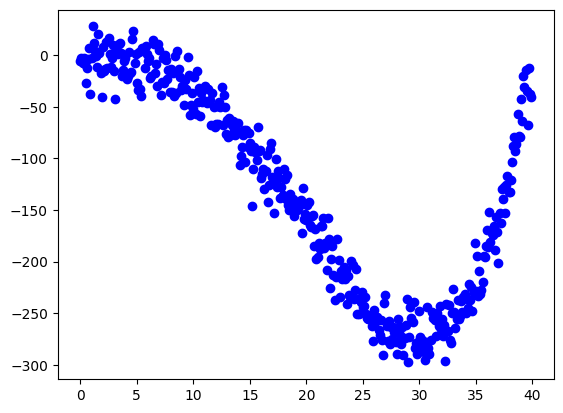

In [2]:
#Read Data
dataSet = np.loadtxt("Q2_Final.csv", delimiter=",", dtype=str)[1:]
dataSet = dataSet.astype('float64')

#ploting Data
plt.plot(dataSet[:,0],dataSet[:,1],'bo')
plt.show()

#### Neuron structure:
in this problem, our network has n+1 input neuron, which each neuron represent a sentence of polynomial of order n. for exaple if n = 4, so we have 5 neuron: {1, x, x^2, x^3, x^4}. each neuron are connected to the output neuron by some weight. our goal is to find each weight by using given labled data.

so in this code, we difine some varible:
1. n: the order of polynomial
2. Weights: show the current weights of neural network, or our polynomial coefficients.
3. X: represent the input neuron {1, x, x^2, ..., x^n} which x is given labled data. so X is list of some numbers.
4. etha: learning Rate. may differ for diffrent n.


#### Generate function:
we said that we represent neural network weights by a list. Generate function get some input x, and return the prediction or expectation of neural network for given x. It is obvious that the closer the function value is to y, the more accurate the network is

In [3]:
def Generate(Weights:list, x:float) -> float:
    X = [x**i for i in range(len(Weights))]
    return np.dot(Weights,X)

#### MSE function:
according to the assignment, our loss function is MSE, which defined as below:

In [4]:
def MSE(Weights:list, Data:list) -> float:
    sigma = 0
    for d in Data:
        sigma += ((d[1] - Generate(Weights,d[0]))**2)
    return sigma/len(Data)

#### Update function:
we use gradient descent method to update the weights of the network. there is a Weight update rule:

𝒘(𝑡+1) = 𝒘(𝑡) + 𝜂 (𝑦i − 𝒘𝑇𝒙i)xi

We run this formula for the entire test data to update the weights.

In [5]:
def Update(Weights:list, Data:list, etha:float) -> list:
    New_Weights = Weights
    
    #for each point in train data, update weights:
    for Point in Data:
        
        #delta is 𝜂(𝑦i − 𝒘𝑇𝒙i)
        delta = etha*(Point[1] - Generate(New_Weights, Point[0]))
        
        #Computing 𝜂(𝑦i − 𝒘𝑇𝒙i)xi as list
        X = [delta*(Point[0]**i) for i in range(len(New_Weights))]
        
        #computing 𝒘(𝑡+1) = 𝒘(𝑡) + 𝜂(𝑦i − 𝒘𝑇𝒙i)xi
        New_Weights = [X[i] + New_Weights[i] for i in range(len(New_Weights))]
        
    #return updated weight    
    return New_Weights

For each number of iterations, we obtain different shuffles from the dataset to find the optimum stochasticly.

In [6]:
def Learn(Data:list,Weights:list, iteration:int, etha:float) -> list:
    
    #for each iteration do:
    for i in range(iteration):
        
        #shuffle data
        np.random.shuffle(Data)
        
        #update weights
        Weights = Update(Weights,Data,etha)
        
    #print final MSE
    print("final MSE: ", MSE(Weights,Data))
    return Weights
    

#### Test model for n = 1
Now we test the model with different polynomial degrees.(1 to 4). We will have 3 parameters for such an experiment.
1. alpha: randomly split the dataset with alpha% to the tarin data and (1-alpha)% to the test data.
2. iteration: The number of iterations that we update the weights of the network with different shuffles.
3. 𝜂 or etha: the learning rate of algorithm

final MSE:  4410.324256741609
MSE on test data:  3189.6860169227534
final Weights:  [-3.138817759513955, -6.383308219821595]


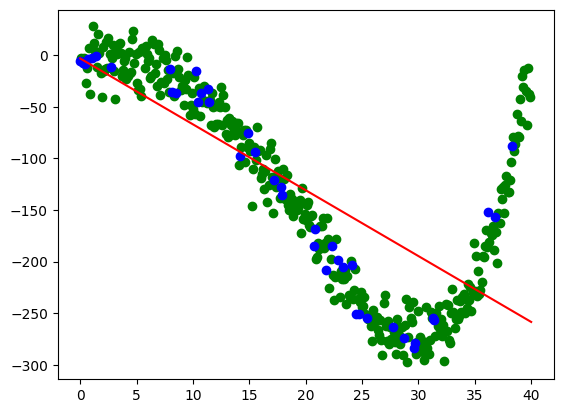

In [7]:
#shuffle dataset and extract test data and train data. alpha% of dataset is for training.
alpha = 0.9
np.random.shuffle(dataSet)
dataCount = len(dataSet)
Train_data = dataSet[:int(dataCount*alpha)]
Test_data = dataSet[int(dataCount*alpha):]

#defining the degree of polynomial:
Degree = 1

#defining initial weights:
Weights = [0 for i in range(Degree+1)]

#train network:
Weights = Learn(Train_data,Weights,15000,10**-4.9)

#print MSE on test data:
print("MSE on test data: ", MSE(Weights,Test_data))
print("final Weights: ",Weights)

#ploting results:
plt.scatter(Train_data[:,0],Train_data[:,1],color='green')
plt.scatter(Test_data[:,0],Test_data[:,1],color='blue')
x = np.linspace(0,40,100)
y = Generate(Weights,x)
plt.plot(x,y,color='red')
plt.show()

#### Test results for n = 1
with alpha = 0.9, iteration = 10000, etha = 10^-4.9 , We reached the following results:
1. finial MSE on train data: 4207.69
2. MSE on test data:  4989.79
3. final Weights:  [-2.4310995479365913, -6.4994152800659]


#### Testing model for n = 2
Based on the plot, we can understand that the linear model with degree 1 does not work well. so we try for n = 2

final MSE:  3653.024662211127
MSE on test data:  2923.6254182281637
final Weights:  [1.1031258795573688, -11.575187110527535, 0.1775754596772829]


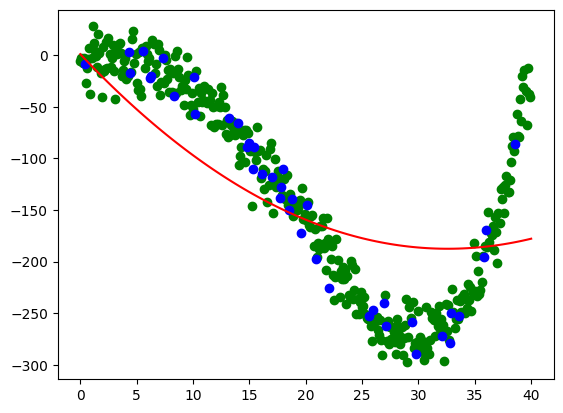

In [8]:
#shuffle dataset and extract test data and train data. alpha% of dataset is for training.
alpha = 0.9
np.random.shuffle(dataSet)
dataCount = len(dataSet)
Train_data = dataSet[:int(dataCount*alpha)]
Test_data = dataSet[int(dataCount*alpha):]

#defining the degree of polynomial:
Degree = 2

#defining initial weights:
Weights = [0 for i in range(Degree+1)]

#train network:
Weights = Learn(Train_data,Weights,20000,10**-7.5)

#print MSE on test data:
print("MSE on test data: ", MSE(Weights,Test_data))
print("final Weights: ",Weights)

#ploting results:
plt.scatter(Train_data[:,0],Train_data[:,1],color='green')
plt.scatter(Test_data[:,0],Test_data[:,1],color='blue')
x = np.linspace(0,40,100)
y = Generate(Weights,x)
plt.plot(x,y,color='red')
plt.show()

#### Test results for n = 2
with alpha = 0.9, iteration = 20000, etha = 10^-7.5 , We reached the following results:
1. finial MSE on train data: 3431.28
2. MSE on test data:  4306
3. final Weights: [1.0016474816098342, -11.35529791568534, 0.15254802967279132]


#### Testing model for n = 3
Based on the plot, we can understand that the linear model with degree 2 does not work well. The obtained curve does not follow the data distribution. so we try for n = 3

final MSE:  1191.2037181037115
MSE on test data:  1119.5193218298957
final Weights:  [-0.00198562953098573, -0.049396530897704134, -0.8346675276139023, 0.019616486844121588]


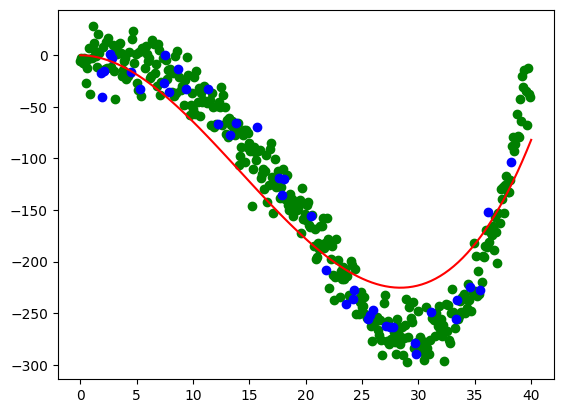

In [9]:
#shuffle dataset and extract test data and train data. alpha% of dataset is for training.
alpha = 0.9
np.random.shuffle(dataSet)
dataCount = len(dataSet)
Train_data = dataSet[:int(dataCount*alpha)]
Test_data = dataSet[int(dataCount*alpha):]

#defining the degree of polynomial:
Degree = 3

#defining initial weights:
Weights = [0 for i in range(Degree+1)]

#train network:
Weights = Learn(Train_data,Weights,20000,10**-10.5)

#print MSE on test data:
print("MSE on test data: ", MSE(Weights,Test_data))
print("final Weights: ",Weights)

#ploting results:
plt.scatter(Train_data[:,0],Train_data[:,1],color='green')
plt.scatter(Test_data[:,0],Test_data[:,1],color='blue')
x = np.linspace(0,40,100)
y = Generate(Weights,x)
plt.plot(x,y,color='red')
plt.show()

#### Test results for n = 3
with alpha = 0.9, iteration = 20000, etha = 10^-10.5 , We reached the following results:
1. finial MSE on train data: 1117.549
2. MSE on test data:  1173.15
3. final Weights:  [-0.002016709484750244, -0.04932440917932354, -0.8307013439664995, 0.019023144737645627]
according to the plot, we understand third degree polynomials work much better than lower degrees.


#### Testing model for n = 4
We test the model with n = 4 to see if the model works better or not.

final MSE:  256.07066310108854
MSE on test data:  196.4105867133771
final Weights:  [-8.282798472102491e-06, -0.00015082336832855444, -0.0027594836609077075, -0.04033297162187729, 0.0010103875995587676]


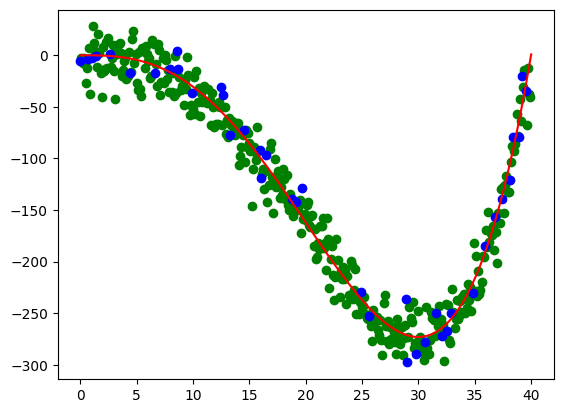

In [10]:
#shuffle dataset and extract test data and train data. alpha% of dataset is for training.
alpha = 0.9
np.random.shuffle(dataSet)
dataCount = len(dataSet)
Train_data = dataSet[:int(dataCount*alpha)]
Test_data = dataSet[int(dataCount*alpha):]

#defining the degree of polynomial:
Degree = 4

#defining initial weights:
Weights = [0 for i in range(Degree+1)]

#train network:
Weights = Learn(Train_data,Weights,20000,10**-13)

#print MSE on test data:
print("MSE on test data: ", MSE(Weights,Test_data))
print("final Weights: ",Weights)

#ploting results:
plt.scatter(Train_data[:,0],Train_data[:,1],color='green')
plt.scatter(Test_data[:,0],Test_data[:,1],color='blue')
x = np.linspace(0,40,100)
y = Generate(Weights,x)
plt.plot(x,y,color='red')
plt.show()

#### Test results for n = 4
with alpha = 0.9, iteration = 20000, etha = 10^-13 , We reached the following results:
1. finial MSE on train data: 252.1
2. MSE on test data: 295.93
3. final Weights:  [-8.042174321215886e-06, -0.00014755269699057668, -0.0027303362367116927, -0.0403688316935828, 0.0010142857974513586]

according to the plot, we understand that Polynomial of degree 4 fits the model even more than degree 3.

Now we want to fit the model with higher degrees using ready-made functions

#### Overfitting
We use built-up functions to check overfitting. After running the algorithm, passing degree 6, we will see that mse will increase and the produced model will not fit the data well.

degree:  0
Mean Squared Error: 9865.794309991375


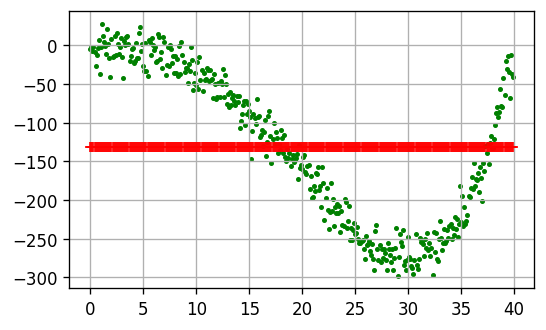

degree:  3
Mean Squared Error: 384.8463747479304


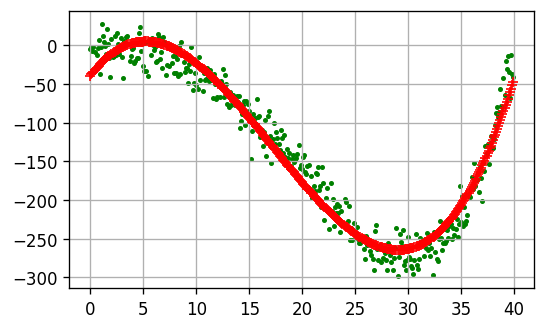

degree:  6
Mean Squared Error: 242.5386275821921


c:\Users\mhnop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.56492e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


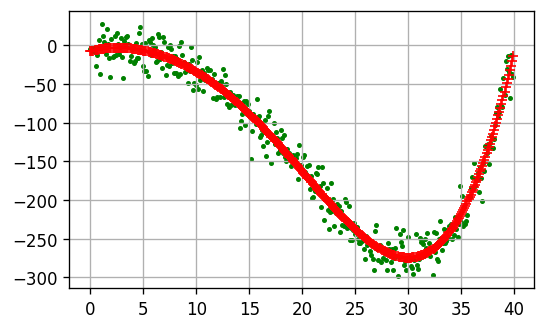

c:\Users\mhnop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.65815e-39): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


degree:  9
Mean Squared Error: 241.0115777847417


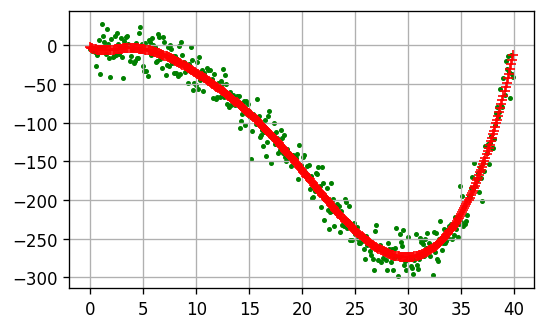

degree:  12
Mean Squared Error: 369.44723696443526


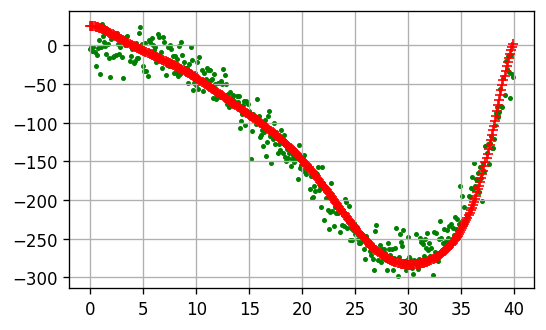

degree:  15
Mean Squared Error: 130856.68841607674


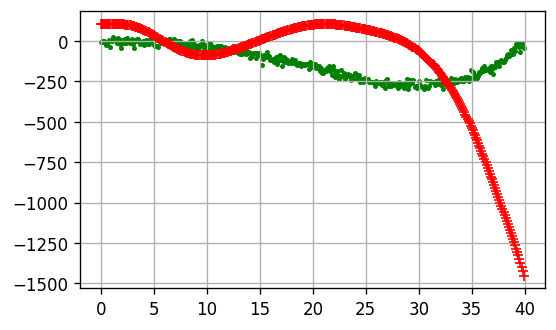

degree:  18
Mean Squared Error: 147881.6437341914


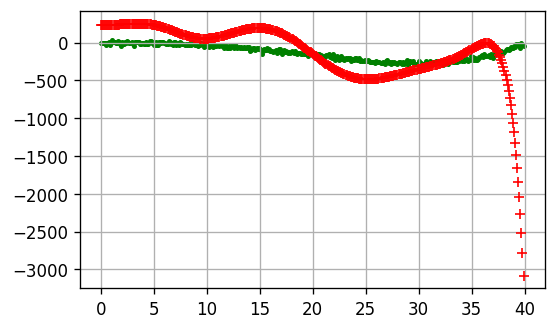

degree:  21
Mean Squared Error: 205049.8716161903


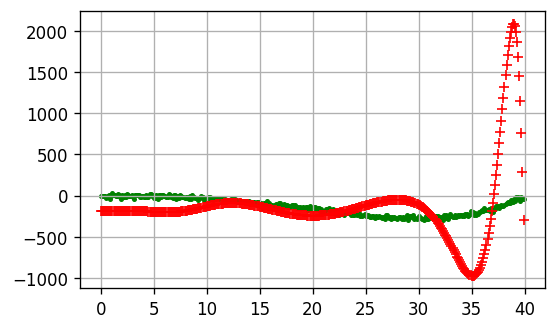

degree:  24
Mean Squared Error: 1377784937.9382982


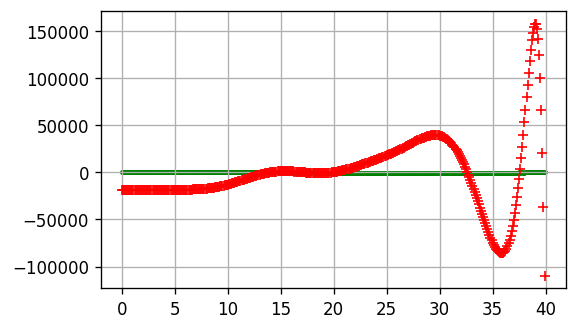

degree:  27
Mean Squared Error: 5085.301956406928


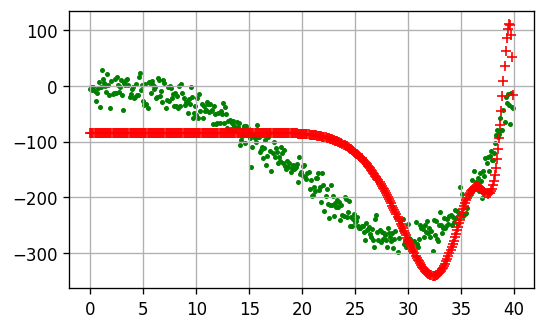

degree:  30
Mean Squared Error: 5036.037216549628


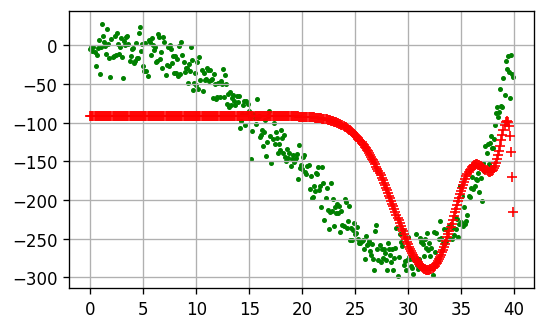

degree:  33
Mean Squared Error: 7349.632197730916


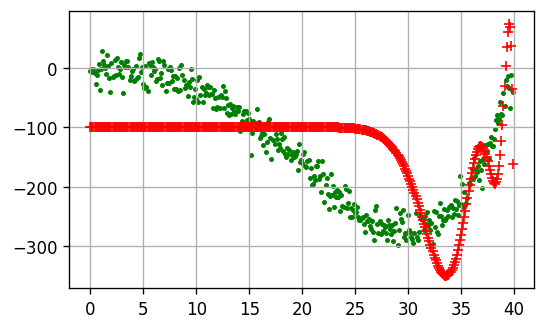

degree:  36
Mean Squared Error: 6263.0890105629105


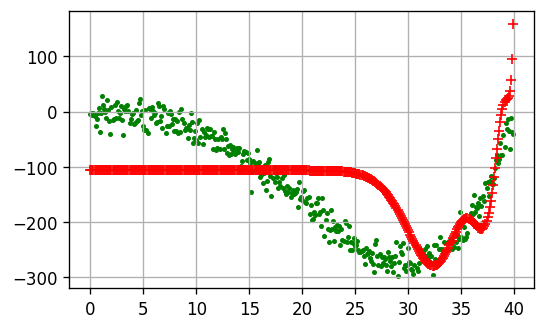

degree:  39
Mean Squared Error: 6414.778531155973


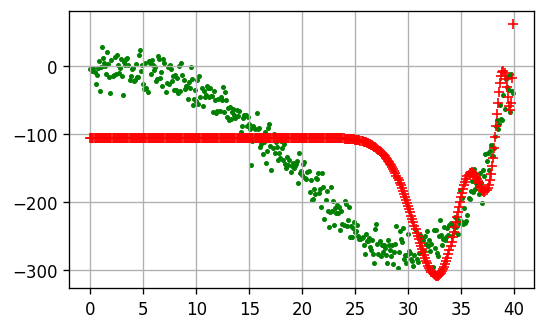

degree:  42
Mean Squared Error: 8726.701671084411


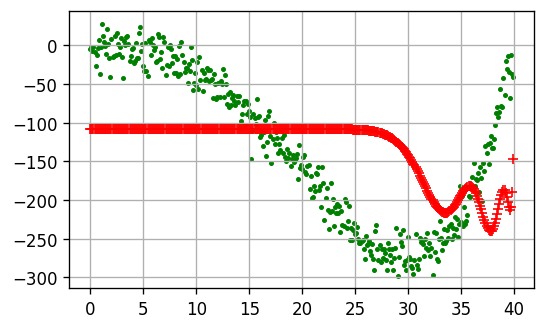

degree:  45
Mean Squared Error: 17501.019046169193


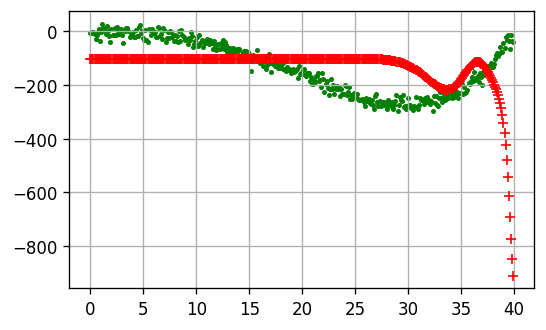

degree:  48
Mean Squared Error: 9328.243946098764


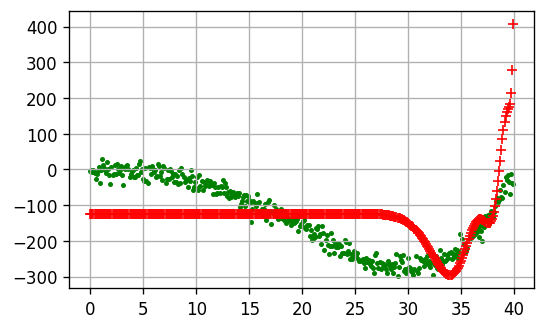

degree:  51
Mean Squared Error: 8531.98393105222


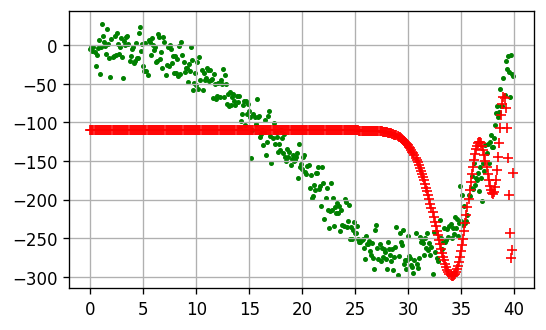

degree:  54
Mean Squared Error: 8423.091121815605


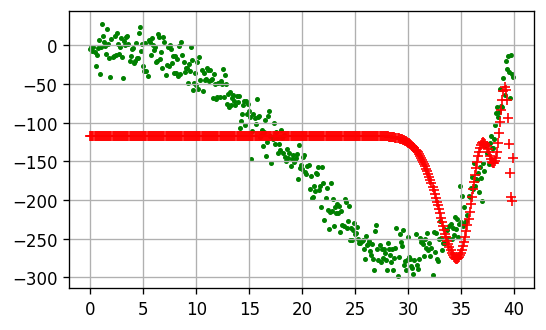

degree:  57
Mean Squared Error: 9698.921292758321


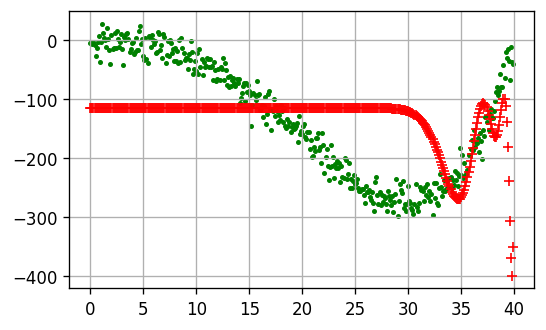

degree:  60
Mean Squared Error: 8671.309240970935


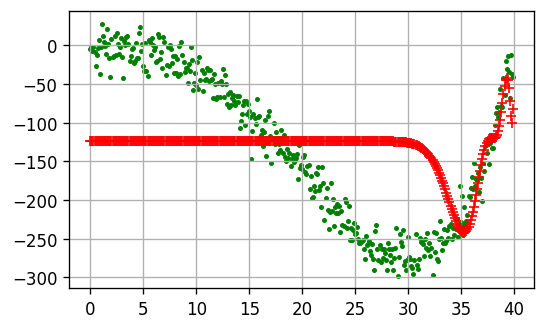

degree:  63
Mean Squared Error: 14359.69034243578


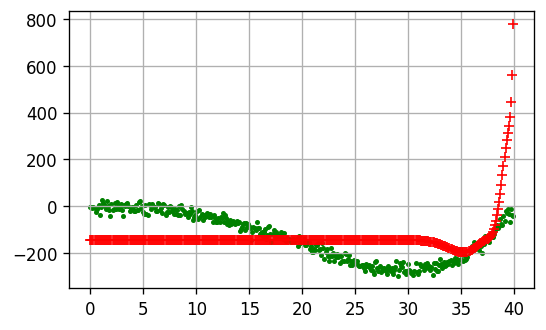

degree:  66
Mean Squared Error: 9280.944986991008


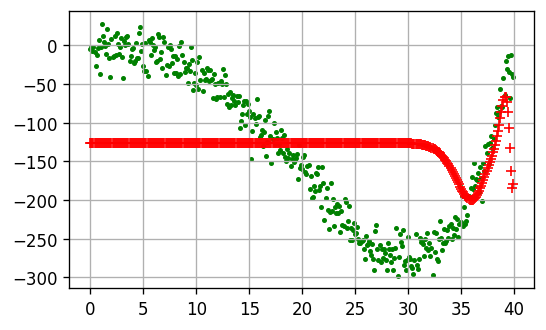

degree:  69
Mean Squared Error: 13677.267216565639


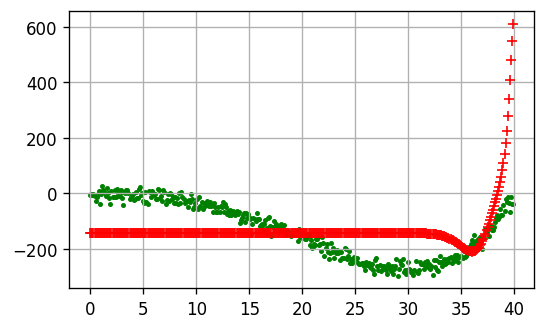

degree:  72
Mean Squared Error: 11223.021483337896


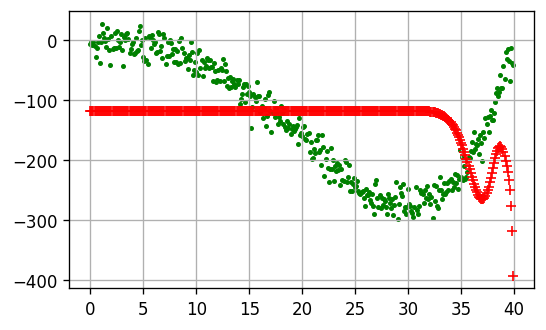

degree:  75
Mean Squared Error: 10209.51996785121


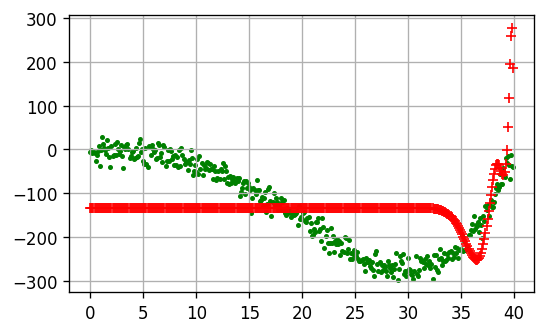

degree:  78
Mean Squared Error: 10720.64718068117


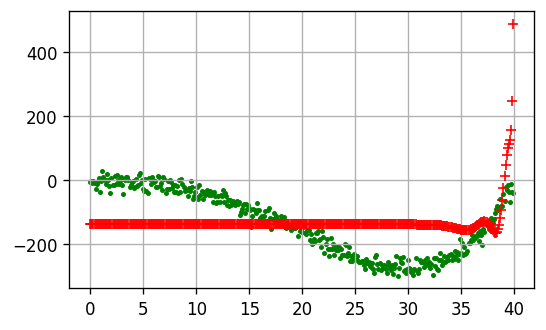

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

#data
x = dataSet[:,0]
y = dataSet[:,1]

#for each degree do:
for n in range(0,80,3):

    #build a polynomial:
    poly = PolynomialFeatures(n)
    x_poly = poly.fit_transform(x.reshape(-1,1))
    model = Ridge(n*10**-n)
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)

    mse = mean_squared_error(y, y_pred)
    print("degree: ", n)
    print("Mean Squared Error:", mse)

    #plot polynomial
    plt.figure(figsize = (5, 3), dpi = 120)
    plt.scatter(x, y,color='green', s=4)
    plt.plot(x, y_pred,'r+')
    plt.grid()
    plt.show()

#### the ratio of train data to test data
Until now, we have taken alpha 0.9, which represents the ratio of train data to the total data. Now we want to test for n = 4, which according to the above results is the most suitable degree for data fitting, with different alphas in order to better understand the effect of alpha in the algorithm.

By seeing the results, we conclude that the magnitude of alpha has a direct effect on reducing the model error, and the larger the alpha, the lower the model error.

final MSE:  249.93765536327152
MSE on test data:  236.2312205782676
final Weights:  [-7.664074005453483e-06, -0.0001449173104525142, -0.0027072481077584348, -0.04021634369457266, 0.0010060988265834952]


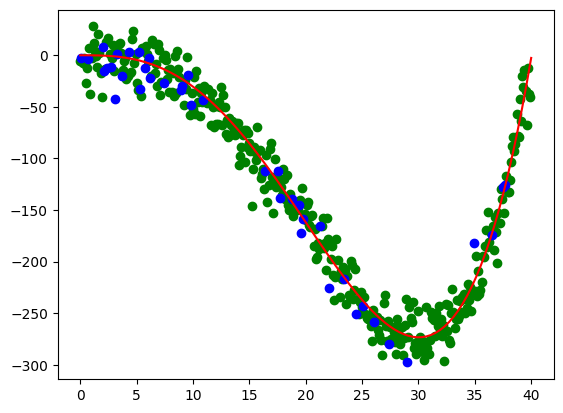

final MSE:  309.6987173884142
MSE on test data:  259.5577075792192
final Weights:  [-8.02920071238565e-06, -0.00014742159749910858, -0.002731391854518825, -0.040375372333252536, 0.001018268031920783]


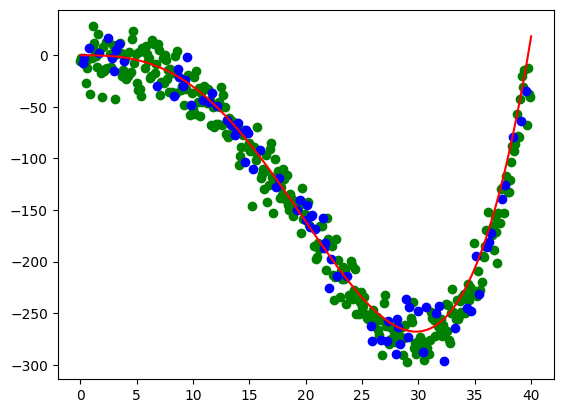

final MSE:  256.8216238580839
MSE on test data:  236.22138004880026
final Weights:  [-7.964302334613855e-06, -0.00014678148955669565, -0.002714131298175961, -0.04005413581618526, 0.001002301613796352]


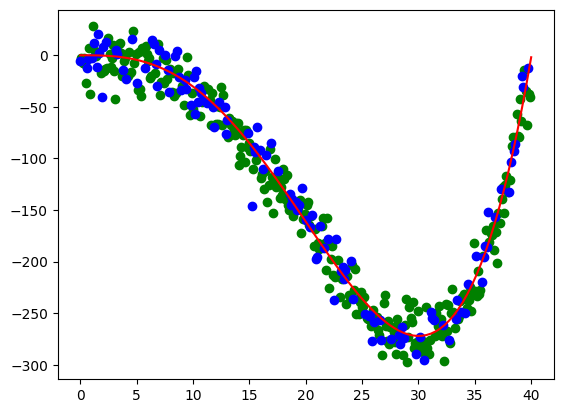

final MSE:  239.29540818373263
MSE on test data:  272.5769553366895
final Weights:  [-8.006370022084573e-06, -0.00014638535291472665, -0.002702246607469108, -0.03973678742182331, 0.0009906588818454655]


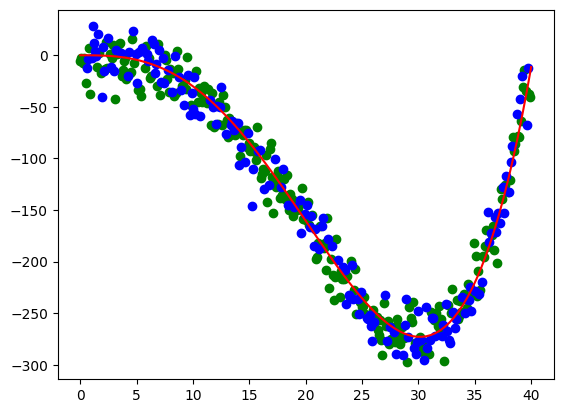

final MSE:  257.734872164408
MSE on test data:  247.28284837093517
final Weights:  [-7.283289383161141e-06, -0.00014154577947979159, -0.002669136382692053, -0.039792088272498694, 0.0009919108953682354]


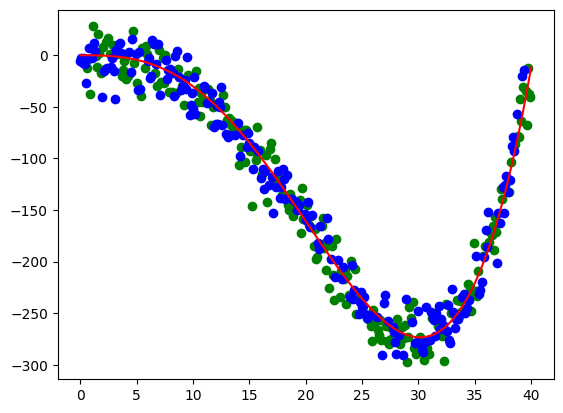

final MSE:  358.3393345671601
MSE on test data:  328.20126134922106
final Weights:  [-6.946877523830599e-06, -0.00013564401564049544, -0.002549304763621712, -0.03798669676720053, 0.0009497741628626589]


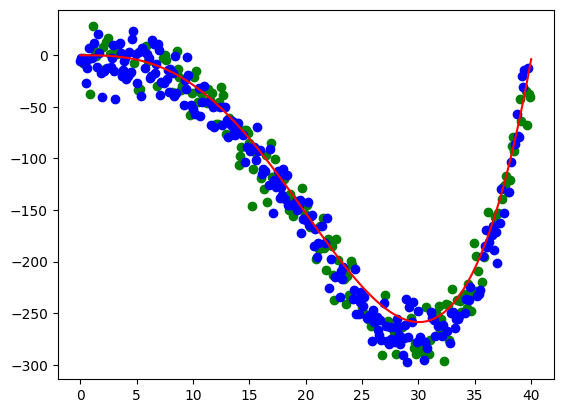

final MSE:  562.4431792719323
MSE on test data:  419.8025392567993
final Weights:  [-6.891475938909623e-06, -0.00013124917530282223, -0.0024417420533674786, -0.036162184590235374, 0.000899332613811559]


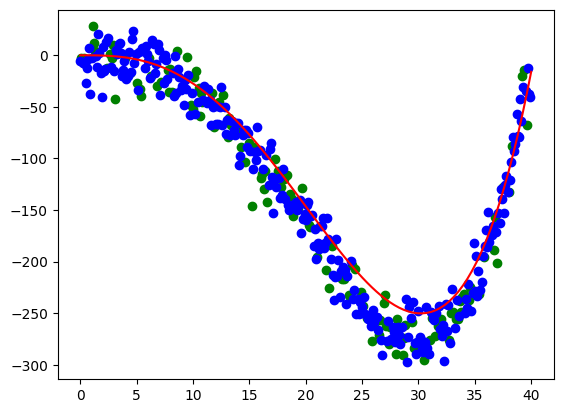

final MSE:  760.3152850165562
MSE on test data:  700.8379641024868
final Weights:  [-5.809714089771737e-06, -0.00011628333285520597, -0.002221637549519485, -0.033385995913705085, 0.0008078664363702357]


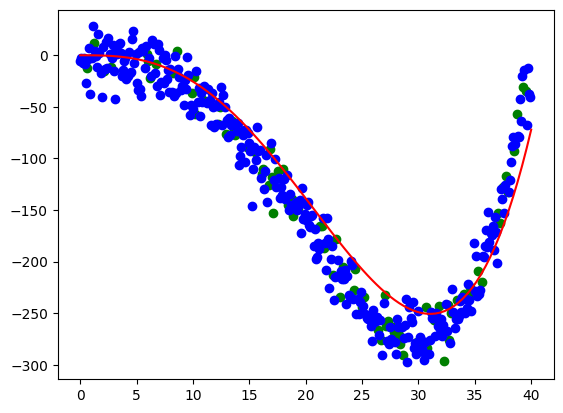

final MSE:  3438.0559604311734
MSE on test data:  4303.481331692965
final Weights:  [-3.672563165519166e-06, -7.033585503227962e-05, -0.0013317285731822177, -0.019885873529707086, 0.0004185692474498585]


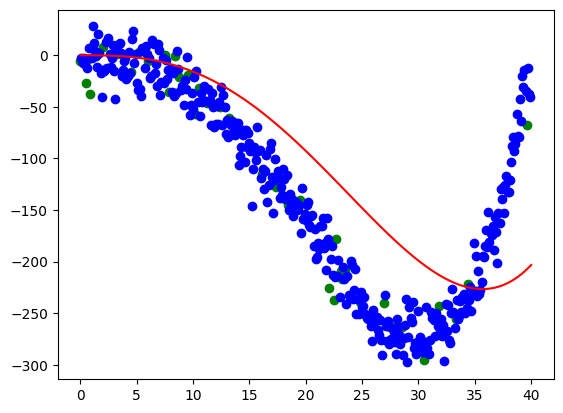

In [12]:
Degree = 4
for alpha in range(9,0,-1):
    alpha *= 0.1
    np.random.shuffle(dataSet)
    dataCount = len(dataSet)
    Train_data = dataSet[:int(dataCount*alpha)]
    Test_data = dataSet[int(dataCount*alpha):]

    #defining initial weights:
    Weights = [0 for i in range(Degree+1)]

    #train network:
    Weights = Learn(Train_data,Weights,20000,10**-13)

    #print MSE on test data:
    print("MSE on test data: ", MSE(Weights,Test_data))
    print("final Weights: ",Weights)

    #ploting results:
    plt.scatter(Train_data[:,0],Train_data[:,1],color='green')
    plt.scatter(Test_data[:,0],Test_data[:,1],color='blue')
    x = np.linspace(0,40,100)
    y = Generate(Weights,x)
    plt.plot(x,y,color='red')
    plt.show()

#### Adding Regularization to network

now we want to add regularization to our algorithm and check if it become better or not. in regularization we define the formuala 

𝒘 = (𝑦𝑖 −𝝓(𝒘𝑇𝒙𝑖))^2 + 𝜆𝒘𝑇w

in fact, we add 𝜆𝒘𝑇w to previous formula. 𝜆 is some paramether that prevent algorithm to become overfit. so we re-difine Update function



In [13]:
def Update_Regularization(Weights:list, Data:list, etha:float, landa:float) -> list:
    New_Weights = Weights
    
    #for each point in train data, update weights:
    for Point in Data:
        
        #delta is 𝜂(𝑦i − 𝒘𝑇𝒙i)
        delta = etha*(Point[1] - Generate(New_Weights, Point[0]))
        
        #landa is 𝜆𝒘𝑇w
        𝜆 = landa*np.dot(New_Weights,New_Weights)
        
        #Computing 𝜂(𝑦i − 𝒘𝑇𝒙i)xi + 𝜆𝒘𝑇w as list
        X = [delta*(Point[0]**i) for i in range(len(New_Weights))]
        
        #computing 𝒘(𝑡+1) = 𝒘(𝑡) + 𝜂(𝑦i − 𝒘𝑇𝒙i)xi
        New_Weights = [X[i] + New_Weights[i] + 𝜆 for i in range(len(New_Weights))]
        
    #return updated weight    
    return New_Weights

In [14]:
def Train(Data:list,Weights:list, iteration:int, etha:float, landa:float) -> list:
    
    #for each iteration do:
    for i in range(iteration):
        
        #shuffle data
        np.random.shuffle(Data)
        
        #update weights
        Weights = Update_Regularization(Weights,Data,etha,landa)
        
        print(MSE(Weights,Data))
    print("final MSE: ", MSE(Weights,Data))
    return Weights

22701.241696498764
26123.66305099061
23939.691241534674
23977.944890232804
22305.197891243657
23844.374730356234
22281.54358275167
22696.74565343691
23337.010523418434
29221.49353049253
22380.89682095327
24157.71516598929
27220.431688829733
23448.324954365857
26132.759270212384
22257.561101284336
23614.054385549887
22280.87160374175
23656.550942889222
25448.283876392798
23549.17763367229
23109.028805318838
22317.62482424117
24600.970089967657
23123.771667836674
22352.662194298482
22508.39473809335
22492.01432788401
23085.806749706066
22276.721141942056
22872.629301662288
23046.779496645748
25482.700980652397
23747.92413956755
22232.609768130867
22362.23109626651
26001.98910792824
22560.093581917383
23647.489381954347
22370.525255094304
24627.724050093788
22387.121124689776
22442.542486905597
23131.15687127914
22672.37575710939
22188.971198492673
23009.565510413435
23087.798061402587
22579.613278065473
22259.611452416815
22762.595069321902
22319.553693945265
22232.854304527667
22162.457

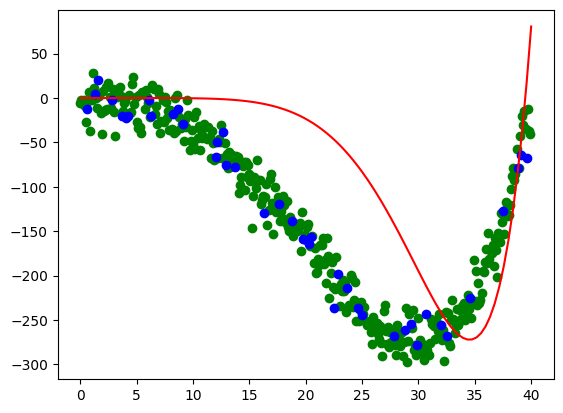

In [15]:
#shuffle dataset and extract test data and train data. alpha% of dataset is for training.
alpha = 0.9
np.random.shuffle(dataSet)
dataCount = len(dataSet)
Train_data = dataSet[:int(dataCount*alpha)]
Test_data = dataSet[int(dataCount*alpha):]

#defining the degree of polynomial:
Degree = 8

#defining initial weights:
Weights = [0 for i in range(Degree+1)]

#train network:
Weights = Train(Train_data,Weights,20000,10**-25.5,10**-19)

#print MSE on test data:
print("MSE on test data: ", MSE(Weights,Test_data))
print("final Weights: ",Weights)

#ploting results:
plt.scatter(Train_data[:,0],Train_data[:,1],color='green')
plt.scatter(Test_data[:,0],Test_data[:,1],color='blue')
x = np.linspace(0,40,100)
y = Generate(Weights,x)
plt.plot(x,y,color='red')
plt.show()

By applying new changes and testing for n =  8, we understand that the regularization function has improved the performance of the algorithm to some extent. But the speed of our algorithm is still slow for high degrees.